In [2]:
#ANALYZE

In [6]:
import os
import pickle as pk
import matplotlib.pyplot as plt
import numpy as np

In [7]:
filenames = os.listdir('results')

In [8]:
filenames

['.ipynb_checkpoints',
 'flan-t5-small_withInjection.pickle',
 'flan-t5-small_withoutInjection.pickle',
 'flan-t5-large_withoutInjection.pickle',
 'flan-t5-large_withInjection.pickle',
 'batches',
 'flan-t5-small__withInjection.json',
 'flan-t5-large__withInjection.json']

In [9]:
small, large = pk.load(open('results/flan-t5-small_withoutInjection.pickle', 'rb')), pk.load(open('results/flan-t5-large_withoutInjection.pickle', 'rb'))

In [10]:
len(small), len(large)

(1000, 1000)

In [11]:
small[:2], large[:2]

([{'question': 'Which position did Knox Cunningham hold from May 1955 to Apr 1956?',
   'targetWithSimilarityScore': [('Ulster Unionist MP for South Antrim', 0.0)],
   'response': 'vice president'},
  {'question': 'Which position did Knox Cunningham hold from Apr 1956 to Oct 1956?',
   'targetWithSimilarityScore': [('delegate to the Council of Europe and Western European Union Parliamentary Assembly',
     0.0)],
   'response': 'vice president'}],
 [{'question': 'Which position did Knox Cunningham hold from May 1955 to Apr 1956?',
   'targetWithSimilarityScore': [('Ulster Unionist MP for South Antrim',
     0.026862676757433566)],
   'response': 'secretary of state for foreign affairs'},
  {'question': 'Which position did Knox Cunningham hold from Apr 1956 to Oct 1956?',
   'targetWithSimilarityScore': [('delegate to the Council of Europe and Western European Union Parliamentary Assembly',
     0.028494744697361747)],
   'response': 'secretary of state for foreign affairs'}])

In [12]:
for e in small:
    e['targetWithSimilarityScore'] = max(e['targetWithSimilarityScore'], key=lambda x: x[1])
for e in large:
    e['targetWithSimilarityScore'] = max(e['targetWithSimilarityScore'], key=lambda x: x[1])

In [13]:
small[:2], large[:2]

([{'question': 'Which position did Knox Cunningham hold from May 1955 to Apr 1956?',
   'targetWithSimilarityScore': ('Ulster Unionist MP for South Antrim', 0.0),
   'response': 'vice president'},
  {'question': 'Which position did Knox Cunningham hold from Apr 1956 to Oct 1956?',
   'targetWithSimilarityScore': ('delegate to the Council of Europe and Western European Union Parliamentary Assembly',
    0.0),
   'response': 'vice president'}],
 [{'question': 'Which position did Knox Cunningham hold from May 1955 to Apr 1956?',
   'targetWithSimilarityScore': ('Ulster Unionist MP for South Antrim',
    0.026862676757433566),
   'response': 'secretary of state for foreign affairs'},
  {'question': 'Which position did Knox Cunningham hold from Apr 1956 to Oct 1956?',
   'targetWithSimilarityScore': ('delegate to the Council of Europe and Western European Union Parliamentary Assembly',
    0.028494744697361747),
   'response': 'secretary of state for foreign affairs'}])

In [14]:
np.mean([e['targetWithSimilarityScore'][1] for e in small]), np.mean([e['targetWithSimilarityScore'][1] for e in large])

(0.012771493964439077, 0.044100583481642676)

In [19]:
small[0]['targetWithSimilarityScore'][1]

0.0

In [26]:
print(len([x for x in small if x['targetWithSimilarityScore'][1] != 0.0]) / 1000)
print(len([x for x in large if x['targetWithSimilarityScore'][1] != 0.0]) / 1000)

0.066
0.183


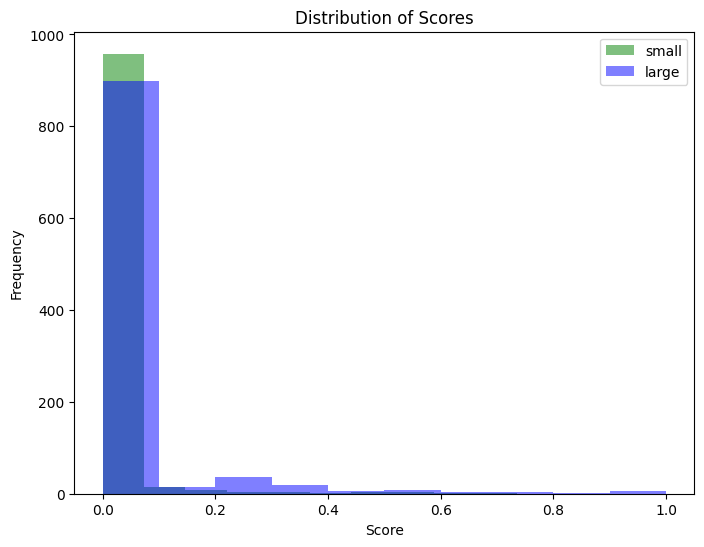

In [16]:
# Creating histogram
plt.figure(figsize=(8, 6))

plt.hist([e['targetWithSimilarityScore'][1] for e in small], alpha=0.5, color='g', label='small')
plt.hist([e['targetWithSimilarityScore'][1] for e in large], alpha=0.5, color='b', label='large')

#plt.hist([e['targetWithSimilarityScore'][1] for e in small], 50, density=True, histtype='step', alpha=0.75)
#plt.hist([e['targetWithSimilarityScore'][1] for e in large], 50, density=True, histtype='step', alpha=0.75)

plt.legend()
# Adding title and labels
plt.title('Distribution of Scores')
plt.xlabel('Score')
plt.ylabel('Frequency')
# Show plot
#plt.grid(True)
plt.show()